In [59]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from nilearn import datasets, plotting, image
from nilearn.maskers import NiftiMapsMasker
from sklearn.decomposition import FastICA
import pandas as pd
import tarfile
import gzip
import nilearn

In [29]:
hcp_file = 'Data/netmats_3T_HCP1200_MSMAll_ICAd100_ts2.tar.gz'

In [30]:
# Read Network Matricies
data_raw = []

with gzip.open(hcp_file, 'rb') as gz_file:
    with tarfile.open(fileobj=gz_file, mode='r') as tar:
        
        # Extract a text file
        for file in tar.getnames():
            if file.endswith('.txt'):
                # Read the content and load it into a NumPy array
                subjects = np.loadtxt(tar.extractfile(file), dtype=float)
                
                ICAd = int(np.sqrt(subjects.shape[1]))
                
                # Convert into matrix
                matrix = np.array([np.reshape(i, (ICAd, ICAd)) for i in subjects])
                data_raw.append(matrix)

In [31]:
id_file = 'Data/IDs/subjectIDs.txt'
id_recon1_file = 'Data/IDs/subjectIDs_recon1.txt'
id_recon2_file = 'Data/IDs/subjectIDs_recon2.txt'

In [32]:
# Read Subject IDs
subject_IDs = np.loadtxt(id_file, dtype=int)

In [33]:
# Read Subject Descriptions
subject_data = pd.read_csv('Data/subjects.csv', index_col = 'Subject')

In [35]:
net_mat2 = data_raw[1]

In [36]:
# Combine the netmats and id data in data frame
net_mat_data = pd.Series(dict(zip(subject_IDs, net_mat2))).to_frame().rename(columns = {0 : 'netmat'})
net_mat_data

,netmat
100206,"[[0.0, 0.61676, 9.5727, -5.4959, 0.34639, 3.00..."
100307,"[[0.0, -0.29664, 17.317, -9.0467, -0.28723, 1...."
100408,"[[0.0, 1.6486, 6.6189, -8.8877, 1.4337, 1.006,..."
100610,"[[0.0, -0.90275, 7.7215, -8.3907, 3.3144, 2.93..."
101006,"[[0.0, -0.088768, 9.4979, -10.412, 1.0646, 4.3..."
...,...
992673,"[[0.0, -0.11536, 7.1338, -5.5322, 0.34004, 1.6..."
992774,"[[0.0, 0.25353, 8.0265, -6.2072, 4.1589, 1.582..."
993675,"[[0.0, -1.0378, 10.709, -3.3224, -0.090704, 2...."
994273,"[[0.0, 0.64613, 11.471, -5.5137, 1.9357, 4.259..."


In [37]:
subject_data = pd.read_csv('Data/subjects.csv', index_col = 'Subject')

In [38]:
subject_data = subject_data[['Gender', 'Age']]

In [39]:
# Combine the netmats and id data in data frame
net_mat_data = pd.Series(dict(zip(subject_IDs, net_mat2))).to_frame().rename(columns = {0 : 'netmat'})
net_mat_data

,netmat
100206,"[[0.0, 0.61676, 9.5727, -5.4959, 0.34639, 3.00..."
100307,"[[0.0, -0.29664, 17.317, -9.0467, -0.28723, 1...."
100408,"[[0.0, 1.6486, 6.6189, -8.8877, 1.4337, 1.006,..."
100610,"[[0.0, -0.90275, 7.7215, -8.3907, 3.3144, 2.93..."
101006,"[[0.0, -0.088768, 9.4979, -10.412, 1.0646, 4.3..."
...,...
992673,"[[0.0, -0.11536, 7.1338, -5.5322, 0.34004, 1.6..."
992774,"[[0.0, 0.25353, 8.0265, -6.2072, 4.1589, 1.582..."
993675,"[[0.0, -1.0378, 10.709, -3.3224, -0.090704, 2...."
994273,"[[0.0, 0.64613, 11.471, -5.5137, 1.9357, 4.259..."


In [40]:
data = subject_data.join(net_mat_data, how = 'right')

In [41]:
male = data[data.get('Gender') == 'M']
female = data[data.get('Gender') == 'F']

In [58]:
male['netmat']

100206    [[0.0, 0.61676, 9.5727, -5.4959, 0.34639, 3.00...
100408    [[0.0, 1.6486, 6.6189, -8.8877, 1.4337, 1.006,...
100610    [[0.0, -0.90275, 7.7215, -8.3907, 3.3144, 2.93...
101107    [[0.0, -0.36684, 13.789, -11.722, 2.1134, 4.88...
101309    [[0.0, -3.2827, 10.096, -3.9288, 1.5772, 0.018...
                                ...                        
989987    [[0.0, 0.45524, 8.3225, -7.293, 2.33, 3.0263, ...
990366    [[0.0, -0.10864, 13.196, -8.5516, 2.562, 2.041...
991267    [[0.0, 0.6578, 13.759, -10.145, -0.19638, 1.48...
992774    [[0.0, 0.25353, 8.0265, -6.2072, 4.1589, 1.582...
994273    [[0.0, 0.64613, 11.471, -5.5137, 1.9357, 4.259...
Name: netmat, Length: 469, dtype: object

In [42]:
male_avg = male['netmat'].agg("mean")
female_avg = female['netmat'].agg("mean")

In [43]:
male_avg - female_avg

array([[ 0.        ,  0.16733586,  0.07263026, ...,  0.03182092,
         0.02316771,  0.14288038],
       [ 0.16733586,  0.        , -0.48334823, ...,  0.18267227,
        -0.05206851, -0.07870042],
       [ 0.07263026, -0.48334823,  0.        , ...,  0.23223379,
         0.04712767,  0.01167113],
       ...,
       [ 0.03182092,  0.18267227,  0.23223379, ...,  0.        ,
        -0.04163293,  0.11617937],
       [ 0.02316771, -0.05206851,  0.04712767, ..., -0.04163293,
         0.        , -0.04420474],
       [ 0.14288038, -0.07870042,  0.01167113, ...,  0.11617937,
        -0.04420474,  0.        ]])

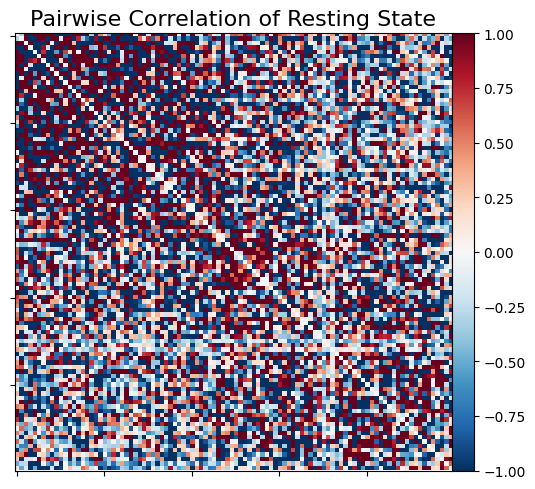

In [50]:
# Visualize the correlation matrix
plotting.plot_matrix(
    male_avg, colorbar=True, vmax=1, vmin=-1, title = "Pairwise Correlation of Resting State")

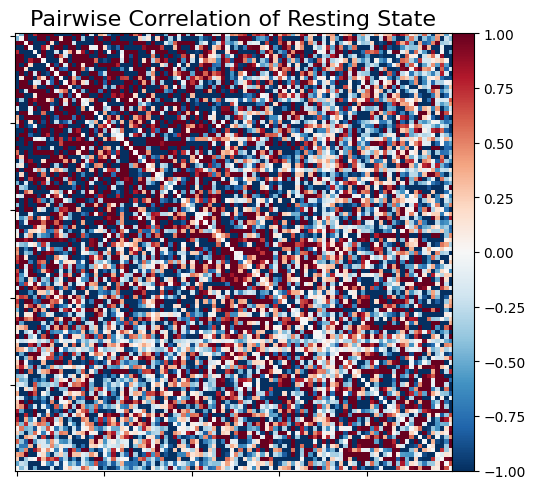

In [51]:
# Visualize the correlation matrix
plotting.plot_matrix(
    female_avg, colorbar=True, vmax=1, vmin=-1, title = "Pairwise Correlation of Resting State")

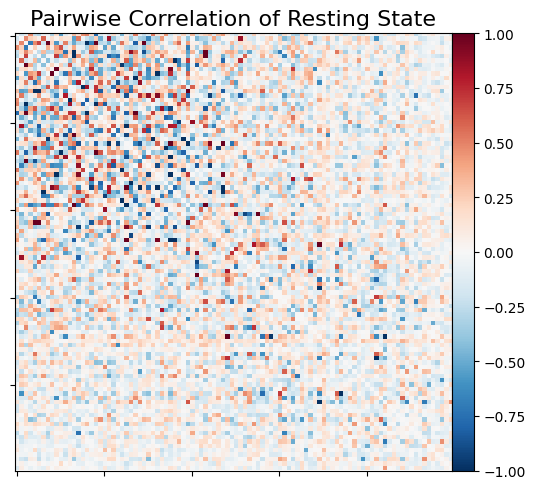

In [52]:
# Visualize the correlation matrix
plotting.plot_matrix(
    female_avg - male_avg, colorbar=True, vmax=1, vmin=-1, title = "Pairwise Correlation of Resting State")

In [64]:
netmats_nilearn = datasets.fetch_megatrawls_netmats(
    dimensionality=300,
    timeseries="eigen_regression",
    matrices="partial_correlation",
)
partial_correlation = netmats_nilearn.correlation_matrices

In [66]:
partial_correlation

array([[  0.       ,  23.528297 , -20.042331 , ...,  -4.5941014,
        -14.914016 ,  16.220441 ],
       [ 23.528297 ,   0.       ,  18.787418 , ...,   2.2756521,
         10.181816 , -10.539248 ],
       [-20.042331 ,  18.787418 ,   0.       , ...,  -3.2641547,
        -13.453338 ,  -9.142006 ],
       ...,
       [ -4.5941014,   2.2756521,  -3.2641547, ...,   0.       ,
         -3.789243 , -10.743472 ],
       [-14.914016 ,  10.181816 , -13.453338 , ...,  -3.789243 ,
          0.       ,   6.7024855],
       [ 16.220441 , -10.539248 ,  -9.142006 , ..., -10.743472 ,
          6.7024855,   0.       ]])

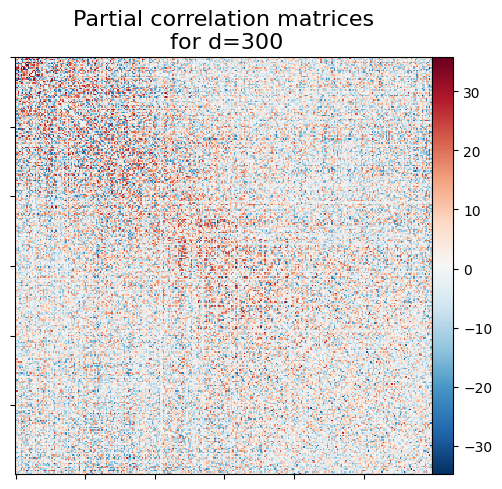

In [68]:
title = "Partial correlation matrices\n for d=300"
display = plotting.plot_matrix(partial_correlation, colorbar=True, title=title)
plotting.show()

In [69]:
from nilearn._utils.data_gen import generate_group_sparse_gaussian_graphs
from nilearn.plotting import show

n_subjects = 20
n_displayed = 3
subjects, precisions, _ = generate_group_sparse_gaussian_graphs(
    n_subjects=n_subjects,
    n_features=10,
    min_n_samples=30,
    max_n_samples=50,
    density=0.1,
)

In [70]:
subjects

[array([[-3.36030702e+00,  1.00831027e+00, -5.23145510e-01,
         -1.08807613e-01, -1.33599999e+00,  8.77363322e-01,
         -4.93062441e-01,  1.62108750e+00,  8.43634805e-01,
          1.58992538e+00],
        [ 1.01376104e+00, -1.53774646e-01,  1.98043257e+00,
         -2.32177890e+00,  2.81168552e+00, -1.95499335e-01,
         -1.18606600e+00,  4.71604334e-01, -1.46275148e-01,
          2.57997658e-02],
        [-1.56043875e+00,  6.11323833e-01,  1.24139465e+00,
          1.62979178e+00, -1.24012276e+00, -4.24412459e-01,
         -1.11316180e+00, -1.08930905e+00, -1.03028956e+00,
         -1.19071840e-01],
        [-9.95388149e-01, -7.77983006e-01, -4.67616598e-01,
          5.36831790e-01,  1.36999271e+00, -9.43342900e-02,
          1.69002134e-01,  1.48590386e+00,  1.92404152e+00,
          1.85549003e-01],
        [-4.30045424e-01,  1.90729480e-02, -1.49976379e+00,
          5.73529505e-03,  6.33431284e-01, -4.03185682e-01,
         -4.13079883e-02,  6.84059252e-01, -1.615882

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  0 out of 4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  2 out of 4


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
C:\Users\terho\AppData\Local\Programs\Python\Python311\Lib\site-packages\nilearn\connectome\group_sparse_cov.py:269: UserWarning: input signals do not all have unit variance. This can lead to numerical instability.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  3 out of 4
[GroupSparseCovarianceCV.fit] Final optimization
[GraphicalLassoCV] Done refinement  1 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s
[GraphicalLassoCV] Done refinement  4 out of 4:   0s
[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   0s
[GraphicalLassoCV] Done refinement  4 out of 4:   0s
[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:   0s
[GraphicalLassoCV] Done refinement  1 out of 4:   0s
[GraphicalLassoCV] Done refinement  2 out of 4:   0s
[GraphicalLassoCV] Done refinement  3 out of 4:   0s
[GraphicalLassoCV] Done refinement  4 out of 4:   0s


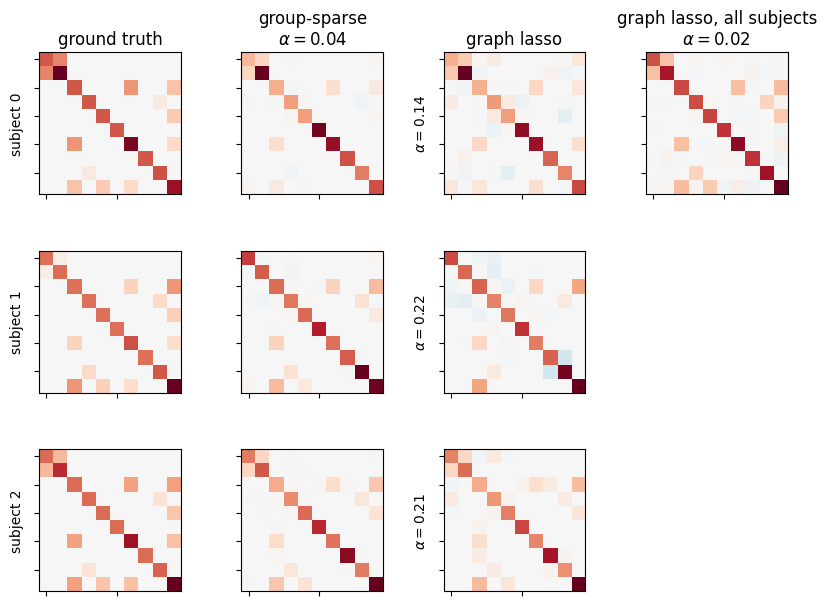

In [76]:
from nilearn import plotting

fig = plt.figure(figsize=(10, 7))
plt.subplots_adjust(hspace=0.4)
for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 1)
    max_precision = precisions[n].max()
    plotting.plot_matrix(
        precisions[n],
        vmin=-max_precision,
        vmax=max_precision,
        axes=ax,
        colorbar=False,
    )

    if n == 0:
        plt.title("ground truth")
    plt.ylabel(f"subject {int(n)}")


# Run group-sparse covariance on all subjects
from nilearn.connectome import GroupSparseCovarianceCV

gsc = GroupSparseCovarianceCV(max_iter=50, verbose=1)
gsc.fit(subjects)

for n in range(n_displayed):
    ax = plt.subplot(n_displayed, 4, 4 * n + 2)
    max_precision = gsc.precisions_[..., n].max()
    plotting.plot_matrix(
        gsc.precisions_[..., n],
        axes=ax,
        vmin=-max_precision,
        vmax=max_precision,
        colorbar=False,
    )
    if n == 0:
        plt.title(f"group-sparse\n$\\alpha={gsc.alpha_:.2f}$")


# Fit one graph lasso per subject
try:
    from sklearn.covariance import GraphicalLassoCV
except ImportError:
    # for Scitkit-Learn < v0.20.0
    from sklearn.covariance import GraphLassoCV as GraphicalLassoCV

gl = GraphicalLassoCV(verbose=1)

for n, subject in enumerate(subjects[:n_displayed]):
    gl.fit(subject)

    ax = plt.subplot(n_displayed, 4, 4 * n + 3)
    max_precision = gl.precision_.max()
    plotting.plot_matrix(
        gl.precision_,
        axes=ax,
        vmin=-max_precision,
        vmax=max_precision,
        colorbar=False,
    )
    if n == 0:
        plt.title("graph lasso")
    plt.ylabel(f"$\\alpha={gl.alpha_:.2f}$")


# Fit one graph lasso for all subjects at once
import numpy as np

gl.fit(np.concatenate(subjects))

ax = plt.subplot(n_displayed, 4, 4)
max_precision = gl.precision_.max()
plotting.plot_matrix(
    gl.precision_,
    axes=ax,
    vmin=-max_precision,
    vmax=max_precision,
    colorbar=False,
)
plt.title(f"graph lasso, all subjects\n$\\alpha={gl.alpha_:.2f}$")

show()